In [5]:
import numpy as np
import pandas as pd
import io
import requests
import matplotlib.pyplot as plt

In [8]:
url="http://covidtracking.com/api/states/daily.csv"
s=requests.get(url).content

In [11]:
df = pd.read_csv(io.StringIO(s.decode('utf-8')))
df

,date,state,positive,probableCases,negative,pending,totalTestResultsSource,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,lastUpdateEt,dateModified,checkTimeEt,death,hospitalized,hospitalizedDischarged,dateChecked,totalTestsViral,positiveTestsViral,negativeTestsViral,positiveCasesViral,deathConfirmed,deathProbable,totalTestEncountersViral,totalTestsPeopleViral,totalTestsAntibody,positiveTestsAntibody,negativeTestsAntibody,totalTestsPeopleAntibody,positiveTestsPeopleAntibody,negativeTestsPeopleAntibody,totalTestsPeopleAntigen,positiveTestsPeopleAntigen,totalTestsAntigen,positiveTestsAntigen,fips,positiveIncrease,negativeIncrease,total,totalTestResultsIncrease,posNeg,dataQualityGrade,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
0,20210307,AK,56886.0,NaN,NaN,NaN,totalTestsViral,1731628.0,33.0,1293.0,NaN,NaN,2.0,NaN,NaN,3/5/2021 03:59,2021-03-05T03:59:00Z,03/04 22:59,305.0,1293.0,NaN,2021-03-05T03:59:00Z,1731628.0,68693.0,1660758.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,0,0,56886,0,56886,NaN,0,0,dc4bccd4bb885349d7e94d6fed058e285d4be164,0,0,0,0,0,NaN
1,20210307,AL,499819.0,107742.0,1931711.0,NaN,totalTestsPeopleViral,2323788.0,494.0,45976.0,NaN,2676.0,NaN,1515.0,295690.0,3/7/2021 11:00,2021-03-07T11:00:00Z,03/07 06:00,10148.0,45976.0,NaN,2021-03-07T11:00:00Z,NaN,NaN,NaN,392077.0,7963.0,2185.0,NaN,2323788.0,NaN,NaN,NaN,119757.0,NaN,NaN,NaN,NaN,NaN,NaN,1,408,2087,2431530,2347,2431530,NaN,-1,0,997207b430824ea40b8eb8506c19a93e07bc972e,0,0,0,0,0,NaN
2,20210307,AR,324818.0,69092.0,2480716.0,NaN,totalTestsViral,2736442.0,335.0,14926.0,141.0,NaN,65.0,1533.0,315517.0,3/7/2021 00:00,2021-03-07T00:00:00Z,03/06 19:00,5319.0,14926.0,NaN,2021-03-07T00:00:00Z,2736442.0,NaN,2480716.0,255726.0,4308.0,1011.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,481311.0,81803.0,NaN,NaN,5,165,3267,2805534,3380,2805534,NaN,22,11,50921aeefba3e30d31623aa495b47fb2ecc72fae,0,0,0,0,0,NaN
3,20210307,AS,0.0,NaN,2140.0,NaN,totalTestsViral,2140.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12/1/2020 00:00,2020-12-01T00:00:00Z,11/30 19:00,0.0,NaN,NaN,2020-12-01T00:00:00Z,2140.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60,0,0,2140,0,2140,NaN,0,0,96d23f888c995b9a7f3b4b864de6414f45c728ff,0,0,0,0,0,NaN
4,20210307,AZ,826454.0,56519.0,3073010.0,NaN,totalTestsViral,7908105.0,963.0,57907.0,273.0,NaN,143.0,NaN,NaN,3/7/2021 00:00,2021-03-07T00:00:00Z,03/06 19:00,16328.0,57907.0,118932.0,2021-03-07T00:00:00Z,7908105.0,NaN,NaN,769935.0,14403.0,1925.0,NaN,3842945.0,580569.0,NaN,NaN,444089.0,NaN,NaN,NaN,NaN,NaN,NaN,4,1335,13678,3899464,45110,3899464,NaN,5,44,0437a7a96f4471666f775e63e86923eb5cbd8cdf,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20775,20200117,WA,0.0,NaN,NaN,NaN,totalTestEncountersViral,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53,0,0,0,0,0,NaN,0,0,7cefac6b3681020741ca30f45399a7b22f2e45b4,0,0,0,0,0,NaN
20776,20200116,WA,0.0,NaN,NaN,NaN,totalTestEncountersViral,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53,0,0,0,0,0,NaN,0,0,650501e005a5ee86d93c5f32dda56735ea2af967,0,0,0,0,0,NaN
20777,20200115,WA,0.0,NaN,NaN,NaN,totalTestEncountersViral,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53,0,0,0,0,0,NaN,0,0,4987e61aad88182abfe641033b597304c2153d4f,0,0,0,0,0,NaN
20778,20200114,WA,0.0,NaN,NaN,NaN,totalTestEncountersViral,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [12]:
df['date'] =  pd.to_datetime(df['date'], format='%Y%m%d')

In [13]:
df.drop(['dateChecked'],axis=1,inplace=True)

In [14]:
df['state']=df['state'].apply(str)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20780 entries, 0 to 20779
Data columns (total 55 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   date                         20780 non-null  datetime64[ns]
 1   state                        20780 non-null  object        
 2   positive                     20584 non-null  float64       
 3   probableCases                9218 non-null   float64       
 4   negative                     13274 non-null  float64       
 5   pending                      2138 non-null   float64       
 6   totalTestResultsSource       20780 non-null  object        
 7   totalTestResults             20614 non-null  float64       
 8   hospitalizedCurrently        17338 non-null  float64       
 9   hospitalizedCumulative       12891 non-null  float64       
 10  inIcuCurrently               11534 non-null  float64       
 11  inIcuCumulative              3792 non-nul

In [17]:
df.head()

,date,state,positive,probableCases,negative,pending,totalTestResultsSource,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,lastUpdateEt,dateModified,checkTimeEt,death,hospitalized,hospitalizedDischarged,totalTestsViral,positiveTestsViral,negativeTestsViral,positiveCasesViral,deathConfirmed,deathProbable,totalTestEncountersViral,totalTestsPeopleViral,totalTestsAntibody,positiveTestsAntibody,negativeTestsAntibody,totalTestsPeopleAntibody,positiveTestsPeopleAntibody,negativeTestsPeopleAntibody,totalTestsPeopleAntigen,positiveTestsPeopleAntigen,totalTestsAntigen,positiveTestsAntigen,fips,positiveIncrease,negativeIncrease,total,totalTestResultsIncrease,posNeg,dataQualityGrade,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
0,2021-03-07,AK,56886.0,NaN,NaN,NaN,totalTestsViral,1731628.0,33.0,1293.0,NaN,NaN,2.0,NaN,NaN,3/5/2021 03:59,2021-03-05T03:59:00Z,03/04 22:59,305.0,1293.0,NaN,1731628.0,68693.0,1660758.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,0,0,56886,0,56886,NaN,0,0,dc4bccd4bb885349d7e94d6fed058e285d4be164,0,0,0,0,0,NaN
1,2021-03-07,AL,499819.0,107742.0,1931711.0,NaN,totalTestsPeopleViral,2323788.0,494.0,45976.0,NaN,2676.0,NaN,1515.0,295690.0,3/7/2021 11:00,2021-03-07T11:00:00Z,03/07 06:00,10148.0,45976.0,NaN,NaN,NaN,NaN,392077.0,7963.0,2185.0,NaN,2323788.0,NaN,NaN,NaN,119757.0,NaN,NaN,NaN,NaN,NaN,NaN,1,408,2087,2431530,2347,2431530,NaN,-1,0,997207b430824ea40b8eb8506c19a93e07bc972e,0,0,0,0,0,NaN
2,2021-03-07,AR,324818.0,69092.0,2480716.0,NaN,totalTestsViral,2736442.0,335.0,14926.0,141.0,NaN,65.0,1533.0,315517.0,3/7/2021 00:00,2021-03-07T00:00:00Z,03/06 19:00,5319.0,14926.0,NaN,2736442.0,NaN,2480716.0,255726.0,4308.0,1011.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,481311.0,81803.0,NaN,NaN,5,165,3267,2805534,3380,2805534,NaN,22,11,50921aeefba3e30d31623aa495b47fb2ecc72fae,0,0,0,0,0,NaN
3,2021-03-07,AS,0.0,NaN,2140.0,NaN,totalTestsViral,2140.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12/1/2020 00:00,2020-12-01T00:00:00Z,11/30 19:00,0.0,NaN,NaN,2140.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60,0,0,2140,0,2140,NaN,0,0,96d23f888c995b9a7f3b4b864de6414f45c728ff,0,0,0,0,0,NaN
4,2021-03-07,AZ,826454.0,56519.0,3073010.0,NaN,totalTestsViral,7908105.0,963.0,57907.0,273.0,NaN,143.0,NaN,NaN,3/7/2021 00:00,2021-03-07T00:00:00Z,03/06 19:00,16328.0,57907.0,118932.0,7908105.0,NaN,NaN,769935.0,14403.0,1925.0,NaN,3842945.0,580569.0,NaN,NaN,444089.0,NaN,NaN,NaN,NaN,NaN,NaN,4,1335,13678,3899464,45110,3899464,NaN,5,44,0437a7a96f4471666f775e63e86923eb5cbd8cdf,0,0,0,0,0,NaN


In [18]:
df.fillna(value=-1, inplace=True)

In [19]:
df.head()

,date,state,positive,probableCases,negative,pending,totalTestResultsSource,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,lastUpdateEt,dateModified,checkTimeEt,death,hospitalized,hospitalizedDischarged,totalTestsViral,positiveTestsViral,negativeTestsViral,positiveCasesViral,deathConfirmed,deathProbable,totalTestEncountersViral,totalTestsPeopleViral,totalTestsAntibody,positiveTestsAntibody,negativeTestsAntibody,totalTestsPeopleAntibody,positiveTestsPeopleAntibody,negativeTestsPeopleAntibody,totalTestsPeopleAntigen,positiveTestsPeopleAntigen,totalTestsAntigen,positiveTestsAntigen,fips,positiveIncrease,negativeIncrease,total,totalTestResultsIncrease,posNeg,dataQualityGrade,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
0,2021-03-07,AK,56886.0,-1.0,-1.0,-1.0,totalTestsViral,1731628.0,33.0,1293.0,-1.0,-1.0,2.0,-1.0,-1.0,3/5/2021 03:59,2021-03-05T03:59:00Z,03/04 22:59,305.0,1293.0,-1.0,1731628.0,68693.0,1660758.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,2,0,0,56886,0,56886,-1.0,0,0,dc4bccd4bb885349d7e94d6fed058e285d4be164,0,0,0,0,0,-1.0
1,2021-03-07,AL,499819.0,107742.0,1931711.0,-1.0,totalTestsPeopleViral,2323788.0,494.0,45976.0,-1.0,2676.0,-1.0,1515.0,295690.0,3/7/2021 11:00,2021-03-07T11:00:00Z,03/07 06:00,10148.0,45976.0,-1.0,-1.0,-1.0,-1.0,392077.0,7963.0,2185.0,-1.0,2323788.0,-1.0,-1.0,-1.0,119757.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1,408,2087,2431530,2347,2431530,-1.0,-1,0,997207b430824ea40b8eb8506c19a93e07bc972e,0,0,0,0,0,-1.0
2,2021-03-07,AR,324818.0,69092.0,2480716.0,-1.0,totalTestsViral,2736442.0,335.0,14926.0,141.0,-1.0,65.0,1533.0,315517.0,3/7/2021 00:00,2021-03-07T00:00:00Z,03/06 19:00,5319.0,14926.0,-1.0,2736442.0,-1.0,2480716.0,255726.0,4308.0,1011.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,481311.0,81803.0,-1.0,-1.0,5,165,3267,2805534,3380,2805534,-1.0,22,11,50921aeefba3e30d31623aa495b47fb2ecc72fae,0,0,0,0,0,-1.0
3,2021-03-07,AS,0.0,-1.0,2140.0,-1.0,totalTestsViral,2140.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,12/1/2020 00:00,2020-12-01T00:00:00Z,11/30 19:00,0.0,-1.0,-1.0,2140.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,60,0,0,2140,0,2140,-1.0,0,0,96d23f888c995b9a7f3b4b864de6414f45c728ff,0,0,0,0,0,-1.0
4,2021-03-07,AZ,826454.0,56519.0,3073010.0,-1.0,totalTestsViral,7908105.0,963.0,57907.0,273.0,-1.0,143.0,-1.0,-1.0,3/7/2021 00:00,2021-03-07T00:00:00Z,03/06 19:00,16328.0,57907.0,118932.0,7908105.0,-1.0,-1.0,769935.0,14403.0,1925.0,-1.0,3842945.0,580569.0,-1.0,-1.0,444089.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,4,1335,13678,3899464,45110,3899464,-1.0,5,44,0437a7a96f4471666f775e63e86923eb5cbd8cdf,0,0,0,0,0,-1.0


In [20]:
def plot_var(var='positiveIncrease',
             state='NY'):
    """
    Plots a bar chart of the given variable over the date range
    """
    assert type(var)==str, "Expected string as the variable name"
    assert type(state)==str, "Expected string as the state name"
 
    y = df[df['state']==state][var]
    x = df[df['state']==state]['date']
    plt.figure(figsize=(12,4))
    plt.title("Plot of \"{}\" for {}".format(var,state),fontsize=18)
    plt.bar(x=x,height=y,edgecolor='k',color='orange')
    plt.grid(True)
    plt.xticks(fontsize=14,rotation=45)
    plt.yticks(fontsize=14)
    plt.show()

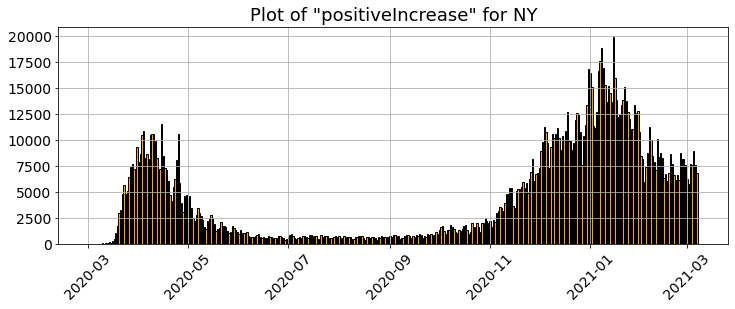

In [21]:
plot_var()

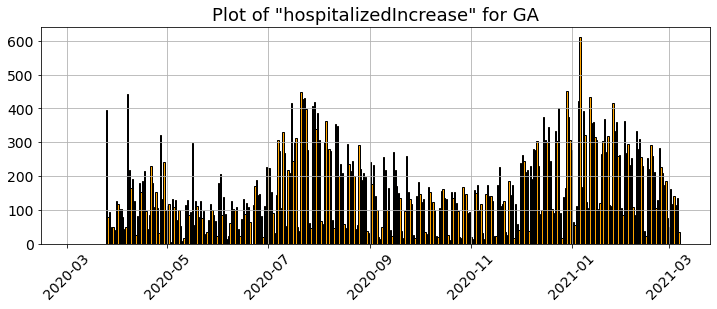

In [22]:
plot_var('hospitalizedIncrease','GA')

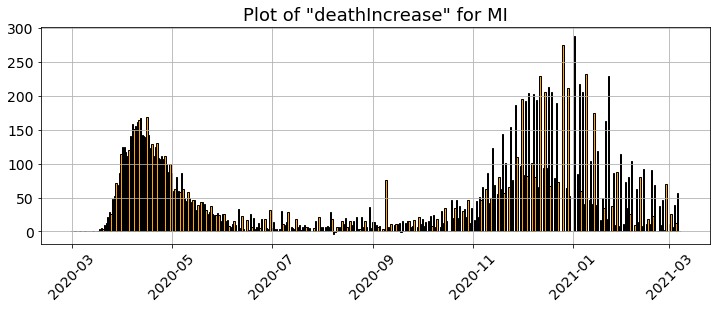

In [24]:
plot_var('deathIncrease','MI')

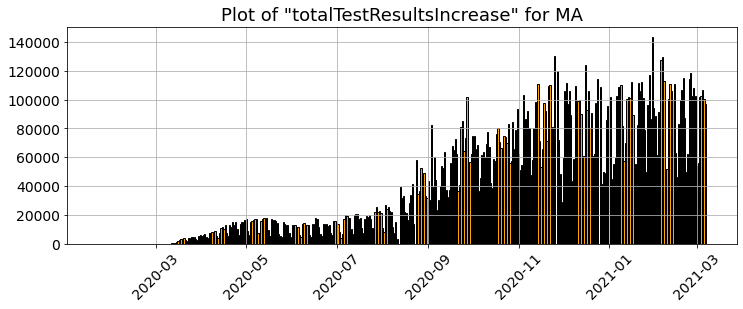

In [25]:
plot_var('totalTestResultsIncrease','MA')

In [26]:
def plot_xy(varx='totalTestResultsIncrease',
            vary='positiveIncrease',
            state='NY'):
    """
    Plots a bar chart of the given variable over the date range
    """
    assert type(varx)==str, "Expected string as the variable x name"
    assert type(vary)==str, "Expected string as the variable y name"
 
    y = df[df['state']==state][vary]
    x = df[df['state']==state][varx]
    if (x.nunique()!=1) and (y.nunique()!=1):
        plt.figure(figsize=(12,4))
        plt.title("Plot of \"{}\" vs. \"{}\" for {}".format(varx,vary,state),fontsize=18)
        plt.scatter(x=x,y=y,edgecolor='k',color='lightgreen',s=100)
        plt.grid(True)
        plt.xticks(fontsize=14,rotation=45)
        plt.yticks(fontsize=14)
        plt.show()
    else:
        print("Some of the data unavailable for a scatter plot. Sorry!")

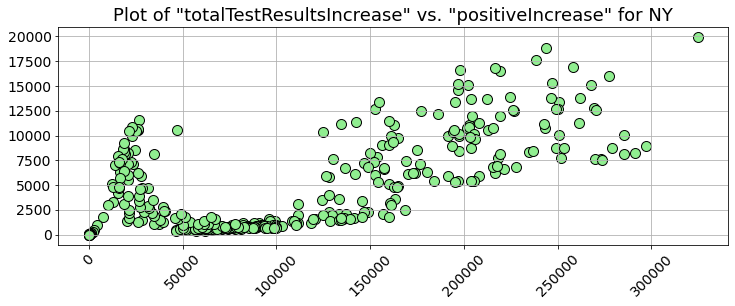

In [27]:
plot_xy(state='NY')

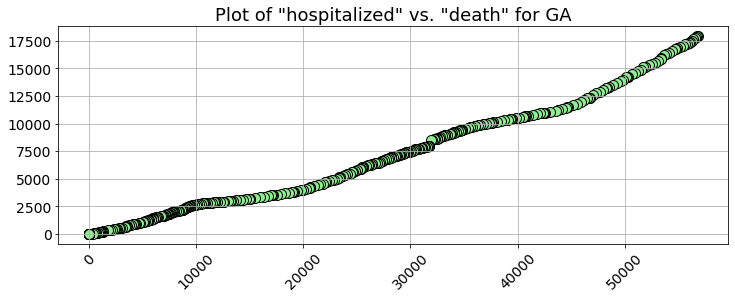

In [28]:
plot_xy('hospitalized','death','GA')

In [29]:
plot_xy('hospitalized','death','CA')

Some of the data unavailable for a scatter plot. Sorry!


In [30]:
def plotTesting(lst_states=['NY','CA','MA','TX','PA']):
    """
    Plots the cumulative testing done by the given list of states
    """
    legends = []
    plt.figure(figsize=(10,5))
    plt.title("Total test results",fontsize=18)
    for s in lst_states:
        data = np.array(df[df['state']==s]['totalTestResults'])[-1::-1]
        slope = int((data[-1]-data[0])/len(data))
        plt.plot(data,linewidth=2)
        plt.text(x=len(data)-2,y=data[-1]*1.05,s=s,fontsize=14)
        legends.append(str(slope)+" tests/day in " + s)
    plt.legend(legends,fontsize=14)
    plt.grid(True)
    plt.xlim(0,len(data)+2)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.xlabel("Days",fontsize=16)
    plt.ylabel("Total test results",fontsize=16)
    plt.show()

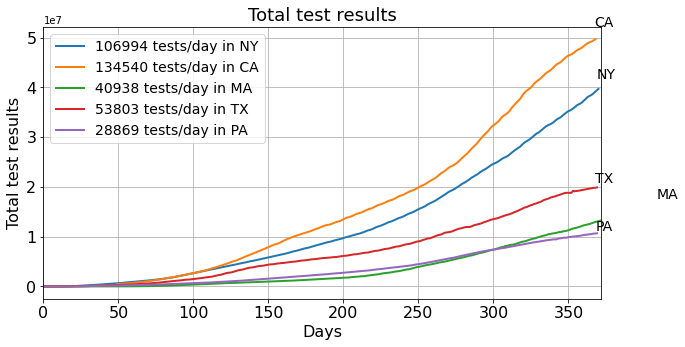

In [31]:
plotTesting()